# Agrupación de clientes

El siguiente proyecto se realiza para lograr la agrupación de clientes en base al ingreso anual y a su puntaje de gasto.

In [1]:
# importando librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings("ignore")
sns.set()

# Importando el dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Análisis del dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Creación del modelo

In [4]:
# creando variable que contiene los valores de las columnas Annual Income y Spending Score
X = df.iloc[:,[3,4]].values

In [5]:
# buscando el valor WCSS(Within Clusters Sum of Squares) usando distintos numeros de clusters
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

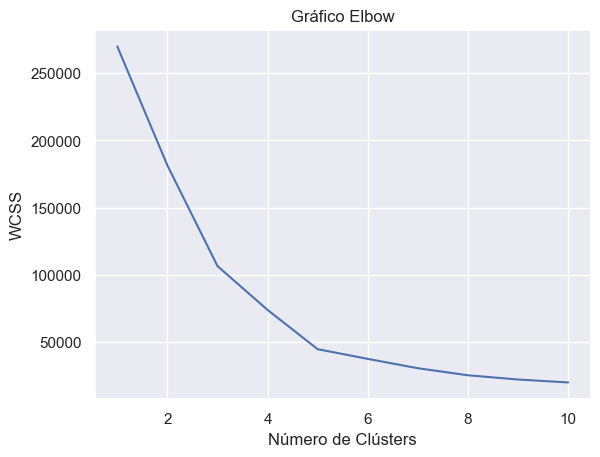

In [6]:
# grafico Elbow
plt.plot(range(1,11), wcss)
plt.title("Gráfico Elbow")
plt.xlabel("Número de Clústers")
plt.ylabel("WCSS")
plt.show()

El número óptimo de Clústers es 5.

# Entrenamiento del modelo K-Means

In [7]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# devuelve una etiqueta para cada punto de datos según su Clúster
Y = kmeans.fit_predict(X)

# Visualizando los Clústers

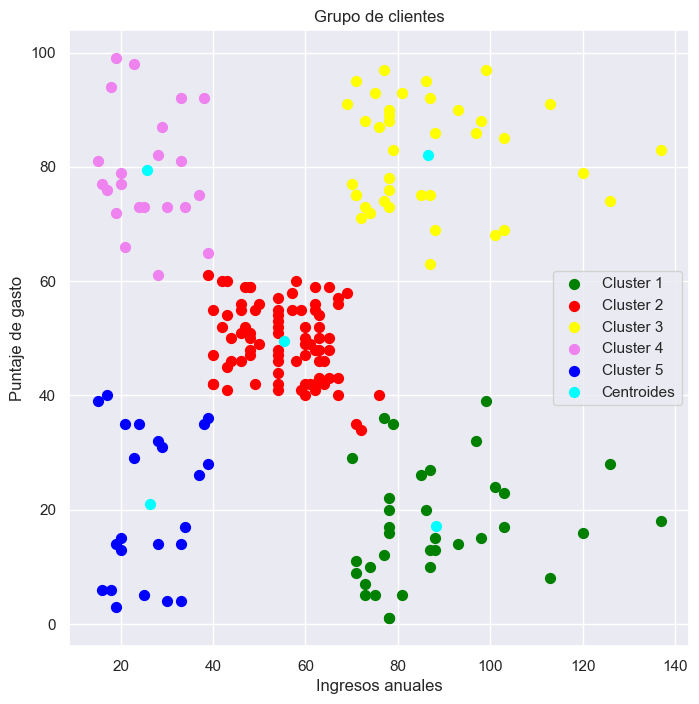

In [8]:
# graficando los clústers
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c="green", label="Cluster 1")
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c="red", label="Cluster 2")
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c="yellow", label="Cluster 3")
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c="violet", label="Cluster 4")
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c="blue", label="Cluster 5")

# graficando los centroides
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c="cyan", label="Centroides")

plt.title("Grupo de clientes")
plt.xlabel("Ingresos anuales")
plt.ylabel("Puntaje de gasto")
plt.legend()
plt.show()

# Sistema de predicción

In [9]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
def agrupacion_cliente (data):
    input_data_as_numpy_array= np.asarray(data)

    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

    prediction = kmeans.predict(input_data_reshaped)
    
    print(f"El cliente pertenece al Clúster {prediction[0]+1}")

In [13]:
cliente = (50,50) 
agrupacion_cliente(cliente)

El cliente pertenece al Clúster 2
